# IMPORT / DEF

In [2]:
import librosa
import librosa.display
import soundfile
import wave
import sklearn
#import Ipython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

pcm_path = 'KsponSpeech_000035.pcm'
wav_path = 'KsponSpeech_000035_7.wav'

min_level_db = -100

In [3]:
def _normalize(S):
    return np.clip((S-min_level_db) / -min_level_db, 0, 1)

# PCM FILE

VALUES:  [-7. -6. -7. ...  2.  3.  5.] 
 (43184,)


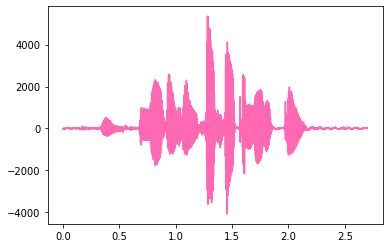

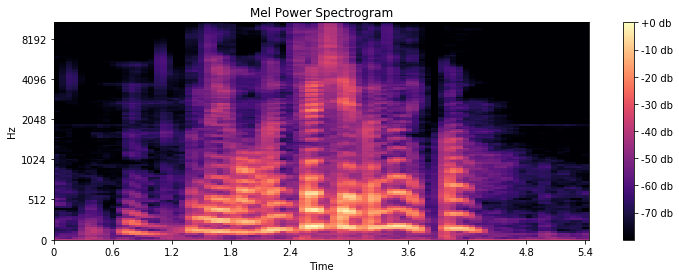

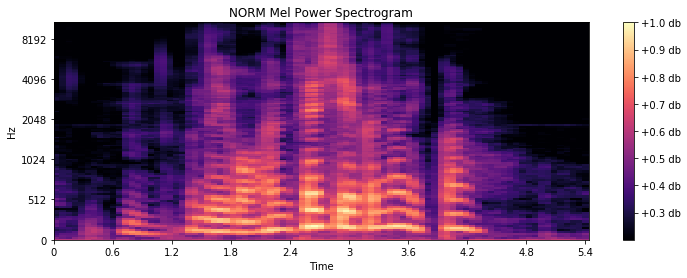

Normalized Mel-Matrix:

 [[0.5791298  0.5988227  0.5948589  ... 0.59632117 0.5691192  0.5477987 ]
 [0.47970304 0.44221482 0.4193072  ... 0.49726236 0.44588947 0.45740905]
 [0.41086105 0.44913322 0.4364691  ... 0.4131212  0.4229687  0.44732437]
 ...
 [0.20000008 0.20000008 0.20000008 ... 0.20000008 0.20000008 0.20000008]
 [0.20000008 0.20000008 0.20000008 ... 0.20000008 0.20000008 0.20000008]
 [0.20000008 0.20000008 0.20000008 ... 0.20000008 0.20000008 0.20000008]]

Shape:

 (128, 85)


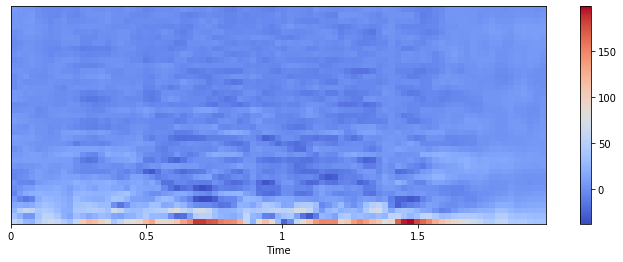

MFCC:

 [[3.8322025e+02 3.9279514e+02 4.0570129e+02 ... 3.5842776e+02
  3.5606024e+02 3.5700610e+02]
 [5.9545486e+01 4.6140251e+01 2.6741404e+01 ... 3.9215435e+01
  3.6391075e+01 3.6964634e+01]
 [3.6168556e+01 2.3504278e+01 5.0569105e+00 ... 3.1769016e+01
  3.0190825e+01 2.9712364e+01]
 ...
 [4.2751632e+00 3.4839389e+00 4.7807341e+00 ... 5.6546946e+00
  5.1306801e+00 6.4697585e+00]
 [5.2009549e+00 3.9494324e+00 3.9352150e+00 ... 2.5088933e+00
  1.9485674e+00 3.7621868e+00]
 [6.4601126e+00 5.0940762e+00 4.3290286e+00 ... 9.1010696e-01
  1.8093076e-01 1.5697229e+00]]

Shape:

 (40, 85)






C:\Users\tripl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\tripl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


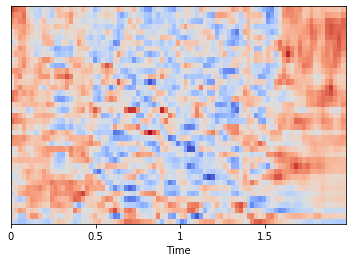

In [4]:
pcmData = np.memmap(pcm_path, dtype='h', mode='r')
pcmData = np.array([float(x) for x in pcmData])

pcmSr = 16000

print("VALUES: ",pcmData,'\n',pcmData.shape)

pcm_time = np.linspace(0, len(pcmData)/pcmSr, len(pcmData))

plt.plot(pcm_time,pcmData, 'hotpink')
plt.show()

pcm_S = librosa.feature.melspectrogram(pcmData, sr=pcmSr, n_mels = 128)
log_pcm_S = librosa.power_to_db(pcm_S, np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_pcm_S, sr=8000, x_axis='time', y_axis='mel')
plt.title("Mel Power Spectrogram")
plt.colorbar(format='%+02.0f db')
plt.show()

plt.figure(figsize=(12,4))
librosa.display.specshow(_normalize(log_pcm_S), sr=8000, x_axis='time', y_axis='mel')
plt.title("NORM Mel Power Spectrogram")
plt.colorbar(format='%+0.1f db')
plt.show()


print('Normalized Mel-Matrix:\n\n', _normalize(log_pcm_S))
print('\nShape:\n\n', _normalize(log_pcm_S).shape)



pcm_mfcc = librosa.feature.mfcc(pcmData, sr=8000, n_mfcc = 40)
plt.figure(figsize=(12,4))
librosa.display.specshow(pcm_mfcc[1:], x_axis='time')
plt.colorbar()
plt.show()

pcm_mfccs = sklearn.preprocessing.scale(pcm_mfcc[1:], axis=1)
librosa.display.specshow(pcm_mfccs, sr=22050, x_axis='time')

print('MFCC:\n\n', pcm_mfcc)
print('\nShape:\n\n', pcm_mfcc.shape)
print('\n\n\n')

# WAV FILE

22050
VALUES: [-1.9497235e-04 -2.3815769e-04 -2.3861612e-04 ...  1.1786796e-04
  9.8876648e-05  0.0000000e+00] 
 (59513,)


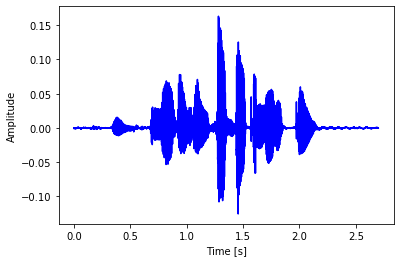

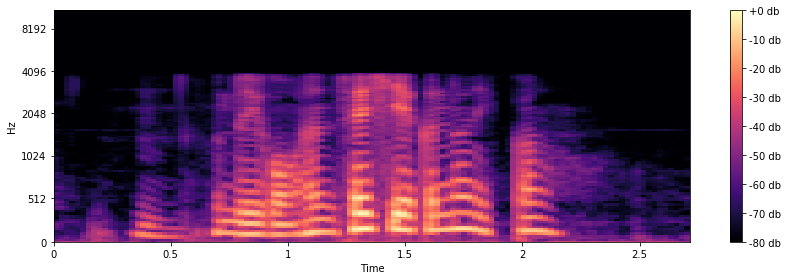

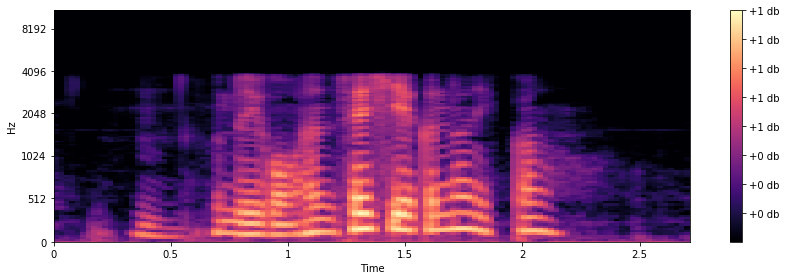

Normalized Mel-Matrix:

 [[0.5605764  0.5886294  0.5951638  ... 0.5690258  0.5506444  0.5350195 ]
 [0.4685966  0.4633442  0.44626322 ... 0.44705158 0.40310332 0.46394017]
 [0.37810907 0.42839485 0.46472165 ... 0.3926374  0.4624308  0.4787088 ]
 ...
 [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
 [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
 [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]]

Shape:

 (128, 117)


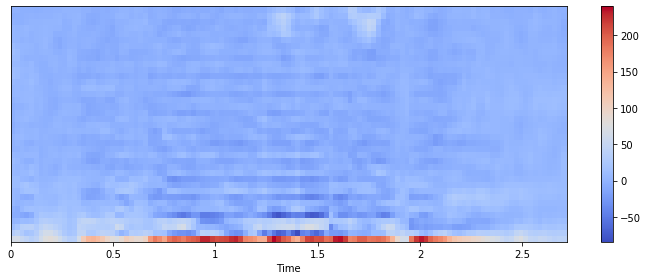

C:\Users\tripl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\tripl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


MFCC:

 [[-6.5230365e+02 -6.5674304e+02 -6.5559961e+02 ... -6.8125549e+02
  -6.8036023e+02 -6.7964142e+02]
 [ 6.6961899e+01  6.6501328e+01  5.1736794e+01 ...  3.9813789e+01
   4.1248032e+01  4.1922180e+01]
 [ 3.4042206e+01  4.2236927e+01  3.0182070e+01 ...  2.9982761e+01
   3.1820786e+01  3.1733574e+01]
 ...
 [-1.2162300e+00 -2.3173609e+00 -3.0130179e+00 ...  1.3169471e+00
  -5.9343368e-01 -5.1374803e+00]
 [-3.4037886e+00 -2.6283784e+00 -3.1076789e+00 ...  1.0309213e+00
  -3.7643135e-01 -3.0101094e+00]
 [-6.2181813e-01 -3.0411616e-01 -2.3939328e+00 ...  7.1971667e-01
  -7.3168457e-01 -9.5350254e-01]]

Shape:

 (40, 117)


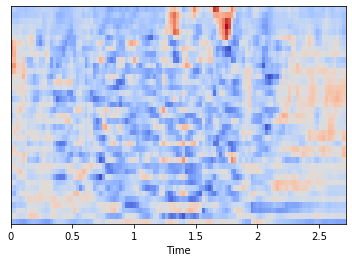

In [7]:
y, fr = librosa.load(wav_path)
print(fr)
print("VALUES:",y,'\n', y.shape)

time = np.linspace(0, len(y)/fr, len(y))

fig, ax2 = plt.subplots()
ax2.plot(time, y, color = 'b', label='speech waveform')
ax2.set_ylabel("Amplitude")
ax2.set_xlabel("Time [s]")
plt.show()

wav_S = librosa.feature.melspectrogram(y, sr=22050, n_mels = 128)
log_wav_S = librosa.power_to_db(wav_S, np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(log_wav_S, sr=22050, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f db')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
librosa.display.specshow(_normalize(log_wav_S), sr=fr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f db')
plt.tight_layout()
plt.show()


print('Normalized Mel-Matrix:\n\n', _normalize(log_wav_S))
print('\nShape:\n\n', _normalize(log_wav_S).shape)

wav_mfcc = librosa.feature.mfcc(y, sr=fr, n_mfcc = 40)
plt.figure(figsize=(10,4))
librosa.display.specshow(wav_mfcc[1:], x_axis='time')
plt.colorbar()
plt.tight_layout()
plt.show()

wav_mfccs = sklearn.preprocessing.scale(wav_mfcc[1:], axis=1)
librosa.display.specshow(wav_mfccs, sr=22050, x_axis='time')

print('MFCC:\n\n', wav_mfcc)
print('\nShape:\n\n', wav_mfcc.shape)

# STFT

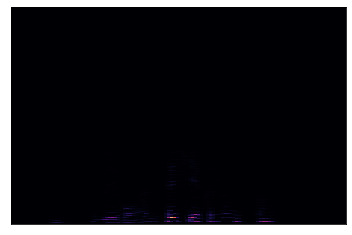

In [39]:
stft_test = librosa.stft(y, center=False)

librosa.display.specshow(stft_test)


In [31]:
import torch

def readwav(file):
    """
    Read a wav file.
    Returns the frame rate, sample width (in bytes) and a numpy array
    containing the data.
    This function does not read compressed wav files.
    """
    wav = wave.open(file)
    rate = wav.getframerate()
    nchannels = wav.getnchannels()
    sampwidth = wav.getsampwidth()
    nframes = wav.getnframes()
    data = wav.readframes(nframes)
    wav.close()
    array = _wav2array(nchannels, sampwidth, data)
    return rate, sampwidth, array

def get_spectrogram_feature(filepath):
    (rate, width, sig) = readwav(filepath)
    sig = sig.ravel()

    stft = torch.stft(torch.FloatTensor(sig),
                        N_FFT,
                        hop_length=int(0.01*SAMPLE_RATE),
                        win_length=int(0.030*SAMPLE_RATE),
                        window=torch.hamming_window(int(0.030*SAMPLE_RATE)),
                        center=False,
                        normalized=False,
                        onesided=True)
    
    #print(stft)
    print(stft[:,:,0])
    print('\n\n')
    print(stft[:,:,1])

    stft = (stft[:,:,0].pow(2) + stft[:,:,1].pow(2)).pow(0.5);
    amag = stft.numpy();
    feat1 = torch.FloatTensor(amag)
    feat2 = torch.FloatTensor(feat1).transpose(0, 1)
    
    #print(feat1.transpose(0,1))
    #print(feat2)

    return feat2

print('\n\n\n')
print(get_spectrogram_feature(wav_path))


C:\Users\tripl\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


tensor([[-3.3849e+03,  8.1217e+02,  4.3704e+03,  ..., -2.0843e+03,
          1.2817e+02,  2.6843e+03],
        [ 2.4194e+03, -6.2103e+02, -2.7804e+03,  ...,  1.1238e+03,
         -1.7544e+00, -1.4885e+03],
        [-9.1230e+02,  4.1571e+02,  5.3776e+02,  ..., -3.2867e+02,
          1.3783e+02,  6.2352e+02],
        ...,
        [-1.1280e+01,  4.7207e+00, -4.9810e+00,  ..., -9.4993e+00,
          3.5489e+00,  6.9449e+00],
        [ 7.2650e+00, -5.5656e+00, -5.2089e+00,  ..., -9.7046e-03,
         -3.1133e+00,  1.5092e+00],
        [-6.1201e+00, -1.5122e+00,  1.2185e+01,  ...,  1.7960e+00,
          1.2656e-01, -4.4043e+00]])



tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 9.3978e+02,  2.0554e+03,  7.0042e+02,  ...,  6.2145e+02,
          9.8341e+02,  8.9991e+02],
        [-1.4361e+02, -4.4343e+02, -6.3967e+02,  ...,  1.1806e+02,
          9.1679e+01, -2.1789e+02],
        ...,
        [-2.0800e+00, -1.2626e+00,  1.0592e